### Discussion Related with Outliers And Impact On Machine Learning
##### Which Machine Learning Model are sensitive to outlier?
1. Naive Bayes Classifier--------Not sensitive to outliers
2. SVM---------------------------Not sensitive to outliers
3. Linear Regression-------------Sensitive to outliers
4. Logistic Regression-----------Sensitive to outliers
5. Decision Trees----------------Not sensitive
6. Ensemble Techniques(RF,GB)----Not sensitive
7. KNN---------------------------Not sensitive
8. Kmeans------------------------Sensitive
9. Heirarchical------------------Sensitive
10. PCA--------------------------Sensitive
11. Neural Networks--------------Sensitive

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Age'].isnull().sum()

177

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\wwwka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

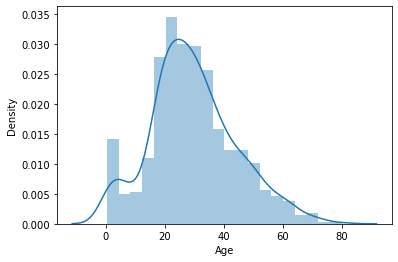

In [7]:
sns.distplot(df['Age'].dropna())

# Gaussian Distributed

Text(0, 0.5, 'No of Passenger')

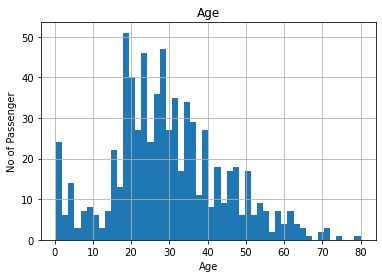

In [8]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

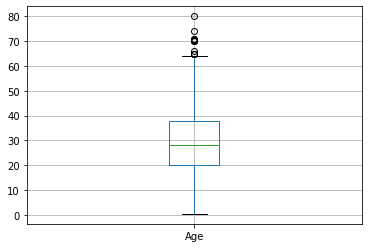

In [10]:
figure=df.boxplot(column='Age')

In [11]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
#Asuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
#As we know in Gaussian distribution before lower boundary and after upper boundary discussed below will be considered as outliers.
upper_boundary=df['Age'].mean() + 3*df['Age'].std()

In [13]:
upper_boundary

73.27860964406095

In [14]:
lower_boundary=df['Age'].mean()-3*df['Age'].std()

In [15]:
lower_boundary

-13.88037434994331

In [16]:
df['Age'].mean()

29.69911764705882

In [17]:
### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)

In [18]:
IQR

17.875

In [19]:
lower_bridge=df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge,upper_bridge)

-6.6875 64.8125


In [20]:
####Extreme outliers
lower_bridge=df['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Age'].quantile(0.75)+(IQR*3)
print(lower_bridge,upper_bridge)

-33.5 91.625


###  If Feature is skewed,we use the below technique

Text(0, 0.5, 'No of passengers')

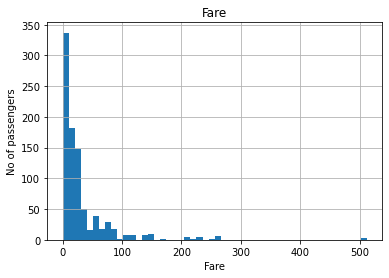

In [22]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel("Fare")
figure.set_ylabel("No of passengers")

C:\Users\wwwka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

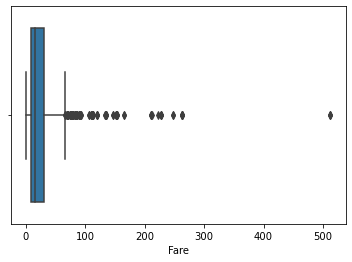

In [23]:
# It is right skewed feature
sns.boxplot(df['Fare'])

In [24]:
# A lot of outliers are present in this feature
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
### Lets compute the Interquantile range to calculate the boundaries
IQR=df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
IQR

23.0896

In [28]:
lower_bridge=df['Fare'].quantile(0.25)-IQR*1.5
upper_bridge=df['Fare'].quantile(0.75)+IQR*1.5
print(lower_bridge,upper_bridge)

-26.724 65.6344


In [29]:
lower_bridge=df['Fare'].quantile(0.25)-IQR*3
upper_bridge=df['Fare'].quantile(0.75)+IQR*3
print(lower_bridge,upper_bridge)

-61.358399999999996 100.2688


In [32]:
data=df.copy()

In [34]:
data.loc[data['Age']>=73,'Age']=73

In [35]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passengers')

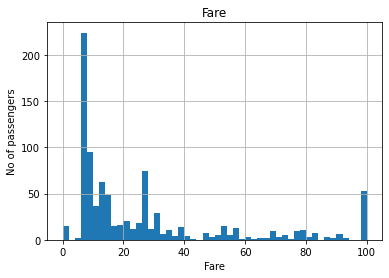

In [38]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel("Fare")
figure.set_ylabel("No of passengers")